In [38]:
# Goal for this project:
# - Develop a model that predicts whether a given picture is one of no mask, mask, or mask worn incorrectly.

# Plan
# - Split data into training and test set.
# - Train a neural network on the training set
# - Prediction on the test set

# Envisioned products
# - A Jupyter notebook that walks a user through the main steps.
# - A Python script that does the same thing.
# - Explain basic concepts at the cells they are relevant (probably won't have this in the .py script)
#     - Overfitting
#     - Each aspect of the neural network
#     - The training/test set division
#     - etc.

import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

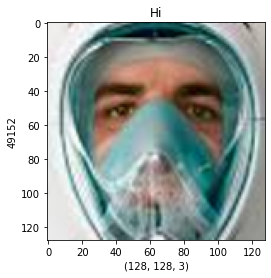

In [11]:
# An example of reading in and displaying an image
# See https://www.kaggle.com/brsdincer/mask-prediction-process-end-to-end

fn = "./Dataset/with_mask/1.png"
img = cv2.imread(fn)
Transformation_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.xlabel(Transformation_RGB.shape)
plt.ylabel(Transformation_RGB.size)
plt.title("Hi")

plt.imshow(Transformation_RGB)

In [98]:
# Put all image data into a pandas dataframe
folders = ["with_mask","without_mask","mask_weared_incorrect"]
filenames = np.array([["./Dataset/"+folders[i]+"/"+str(j)+".png",folders[i]] for i in range(3) for j in range(3001)])
filenames = np.array([filenames[i] for i in range(len(filenames)) if os.path.exists(filenames[i][0])])
filenames = np.reshape(filenames,(filenames.shape[0],filenames.shape[1]))
img_df = pd.DataFrame(
    filenames,
    columns=['Filename', 'Label']
)

In [106]:
# Set up training and testing sets
# See https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
img_df = img_df.sample(frac=1).reset_index(drop=True)
test_size = int(len(img_df)*0.8)
train_size = len(img_df) - test_size
train_df = img_df[:test_size]
test_df = img_df[test_size:]